In [1]:
!pip install "dask[complete]"
!pip install pyarrow pandas
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import re
import dask.dataframe as dd
import glob
from pathlib import Path
import os
import glob
import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
# Directory containing the data files (assuming they are in parquet format)
data_dir = '/content/drive/MyDrive/Data_hasking'

# Get a list of all parquet files for the 10 days
file_list = sorted(glob.glob(f"{data_dir}/*.parquet"))[:10]  # Adjust the slicing if needed
file_list

['/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230801.parquet',
 '/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230802.parquet',
 '/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230803.parquet',
 '/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230804.parquet',
 '/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230805.parquet',
 '/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230806.parquet',
 '/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230807.parquet',
 '/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230808.parquet',
 '/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230809.parquet',
 '/content/drive/MyDrive/Data_hasking/DATA_TB_TRANSACTIONS_20230810.parquet']

In [6]:
# Load all parquet files into a Dask DataFrame
ddf = dd.read_parquet(file_list)
# Compute the DataFrame to get a Pandas DataFrame
df = ddf.compute()

In [7]:
tb_customers = dd.read_parquet('/content/drive/MyDrive/TB_CUSTOMERS.parquet')

In [8]:
tb_customers_df =  tb_customers.compute()
tb_customers_df

CUST_CUSTNO  \
0        e2eaa7a94d5e3bcd15579df95cfadcc33a9ffef9832e5073426dc36a3499c069   
1        30882b5b40eb85071295cc78276c3b74eb0f73eaebad8f009bc0aa04796a565c   
2        9e70464b7a79b94c07a6dc6cf3eea62c1e4cde0872304fd1e03542c898c0a6e9   
3        ce932f938de9bbabd34650dc0d8e07e1814d17580d97440d48905c5a7d0f0d09   
4        9771233eb92c014fd6cc1c0312a93278b5b933fc01a64d0a3f24dac62cd92812   
...                                                                   ...   
3179025  cc1748a291074998ab6fd12d995f4773618f75aac4f6cf33789d8ab3361b658c   
3179026  40062bd373af28817793d4b15ca498238a103ca39213d7857a039181a9328a54   
3179027  5c3d7ca15098f3d43a0b47f193f4a1a47f11b35ca8717277c64b165e2fa3c745   
3179028  b806e3779fe5fcd0efe15d027a91069a07304cddf213a708c8f4318a2305e347   
3179029  e94b3355f764ddbfa603bb16857212760bb12b5731076d2f94b138c03359667d   

        CUSTOMER_TYPE BUSINESS_TYPE  \
0             Cá nhân       CA THE    
1             Cá nhân       CA THE    
2             Cá nhân       CA THE    
3             Cá nhân       CA THE    
4             Cá nhân       CA THE    
...               ...           ...   
3179025       Cá nhân       CA THE    
3179026       Cá nhân       CA THE    
3179027       Cá nhân       CA THE    
3179028       Cá nhân       CA THE    
3179029       Cá nhân       NOI TRO   

                                              INDUSTRY_TYPE  
0                                DICH VU LUU TRU VA AN UONG  
1        SX &PP DIEN/KHI DOT/NUOC NONG/HOI NUOC/DIEU HOA KK  
2                                    HOAT DONG DICH VU KHAC  
3                                    HOAT DONG DICH VU KHAC  
4                                    HOAT DONG DICH VU KHAC  
...                                                     ...  
3179025                              HOAT DONG DICH VU KHAC  
3179026                              HOAT DONG DICH VU KHAC  
3179027                              HOAT DONG DICH VU KHAC  
3179028                              HOAT DONG DICH VU KHAC  
3179029  HD LAM THUE /SX SP VAT CHAT& DV TU TIEU DUNG HO GD  

[3179030 rows x 4 columns]

In [9]:
# Filter for individual customers
tb_customers_individual_df = tb_customers_df[tb_customers_df["CUSTOMER_TYPE"] == "Cá nhân"]

In [10]:
individual_customers = tb_customers_individual_df["CUST_CUSTNO"].unique().tolist()

#RULE 6

In [11]:
# Merge transaction data with individual customer data
df_individual = df[df['CUST_CUSTNO'].isin(individual_customers)]

In [12]:
# Convert VALUEDATE to datetime and set as index
df_individual['VALUEDATE'] = pd.to_datetime(df_individual['VALUEDATE'], errors='coerce')
df_individual.set_index('VALUEDATE', inplace=True)


In [13]:
# Group by customer and resample within 3-day windows
df_grouped = df_individual.groupby('CUST_CUSTNO').resample('3D').agg({'CONTRA_ACCNO': 'nunique'}).reset_index()


In [14]:
# Filter for anomalies where the number of unique contra accounts >= 10
anomalies = df_grouped[df_grouped['CONTRA_ACCNO'] >= 10]


In [15]:
anomalies

CUST_CUSTNO  \
121     000975b0ee367856502b174994023821120d5730b3fcd384eda36753a7e1e2c7   
122     000975b0ee367856502b174994023821120d5730b3fcd384eda36753a7e1e2c7   
123     000975b0ee367856502b174994023821120d5730b3fcd384eda36753a7e1e2c7   
723     0032631c2d2052103e4ba885b81269361664018c1ed8aaa72bf03b7e7a755e4a   
1025    004409ce915f6fe9689ea5a0480144fa99eaeb805aa7509b2ecfa8349590b2af   
...                                                                  ...   
920358  feb237d2cbede4477520a82ae16e592c9bd95eef526b8a00c938c76ef764014f   
920487  febc0044001bed1df6ccdba70e19d51170c757ff9b5912beb8e784897081fa76   
920529  fec007f4a87ba34915602be31762ac4a1858886285122802e8220fe38ade0c33   
923597  ff9e7b04b983f33f20a8c0a9d95e7824a6d54d063de221de62dbf5aaa94f2d3b   
923598  ff9e7b04b983f33f20a8c0a9d95e7824a6d54d063de221de62dbf5aaa94f2d3b   

        VALUEDATE  CONTRA_ACCNO  
121    2023-08-01            13  
122    2023-08-04            11  
123    2023-08-07            12  
723    2023-08-04            11  
1025   2023-08-01            14  
...           ...           ...  
920358 2023-08-07            12  
920487 2023-08-07            12  
920529 2023-08-10            14  
923597 2023-08-07            10  
923598 2023-08-10            11  

[1800 rows x 3 columns]

In [16]:
# Merge anomalies with the original dataframe to get detailed information
anomalous_transactions = df_individual.reset_index().merge(anomalies[['CUST_CUSTNO', 'VALUEDATE']], on=['CUST_CUSTNO', 'VALUEDATE'], how='inner')


In [17]:
# Display the final DataFrame containing all anomalous transactions
anomalous_transactions

VALUEDATE  \
0      2023-08-01   
1      2023-08-01   
2      2023-08-01   
3      2023-08-01   
4      2023-08-01   
...           ...   
176033 2023-08-10   
176034 2023-08-10   
176035 2023-08-10   
176036 2023-08-10   
176037 2023-08-10   

                                                             CUST_CUSTNO  \
0       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
1       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
2       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
3       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
4       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
...                                                                  ...   
176033  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   
176034  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   
176035  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   
176036  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   
176037  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   

       ACC_BUSINESSTYPE  \
0                  CARD   
1                  CASA   
2                  CASA   
3                  CASA   
4                  CASA   
...                 ...   
176033             CASA   
176034             CASA   
176035             CASA   
176036             CASA   
176037             CASA   

                                                               ACC_ACCNO  \
0       5942cd1adcceb7f9c461520ca13ac98243a90dec1295d31df5e94da76d1a600e   
1       2a41b21da840ff3b3819ebb9c3f7f73e7e362201e1a3351abba276e6373906f2   
2       2a41b21da840ff3b3819ebb9c3f7f73e7e362201e1a3351abba276e6373906f2   
3       2a41b21da840ff3b3819ebb9c3f7f73e7e362201e1a3351abba276e6373906f2   
4       9e3cba65b78c89574a8e91564c02f7db0c8b28488964ad0ef4e29370046211ad   
...                                                                  ...   
176033  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   
176034  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   
176035  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   
176036  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   
176037  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   

                                                          ACC_BUSINESSNO  \
0       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
1       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
2       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
3       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
4       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
...                                                                  ...   
176033  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
176034  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
176035  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
176036  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
176037  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   

       ACC_CURRENCYISO BUSINESSNO_TRANS FK_CURRENCY    AMOUNT  AMOUNTORIG  \
0                  VND  202308011836923         VND   -926.70     -926.70   
1                  VND  202308011212570         VND  10000.00    10000.00   
2                  VND  202308011169715         VND  -2000.00    -2000.00   
3                  VND  202308011164691         VND   -500.00     -500.00   
4                  VND  202308011185625         VND -10000.00   -10000.00   
...                ...              ...         ...       ...         ...   
176033             VND  202308106564753         VND   -500.00     -500.00   
176034             VND  202308106584275         VND    275.00      275.00  

In [18]:

from sklearn.cluster import KMeans

# Prepare data for clustering
X = df_grouped[['CONTRA_ACCNO']]

In [19]:
# Determine optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

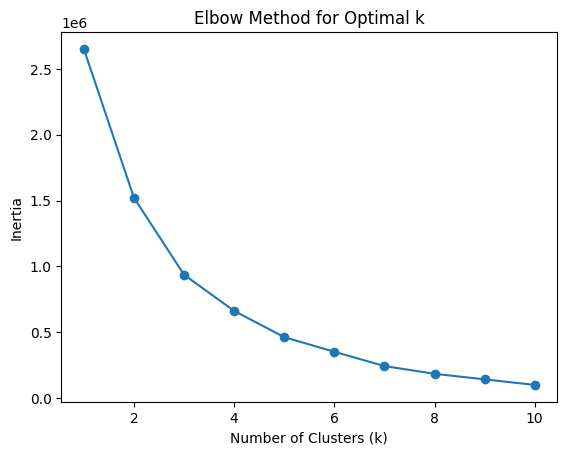

In [20]:
# Plot Elbow method results
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [21]:

# Choose optimal number of clusters based on the plot
optimal_k = 3  # Replace with the optimal k value you determine

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_grouped['cluster'] = kmeans.fit_predict(X)
# Analyze the clusters
print(df_grouped.groupby('cluster')['CONTRA_ACCNO'].describe())


            count        mean        std   min   25%    50%    75%    max
cluster                                                                  
0        853926.0    1.097856   0.445293   0.0   1.0    1.0    1.0    2.0
1            53.0  147.132075  72.285768  78.0  96.0  131.0  196.0  526.0
2         70962.0    4.091570   2.644217   3.0   3.0    3.0    4.0   75.0


In [22]:
# Identify the cluster with the highest average number of contra accounts
cluster_means = df_grouped.groupby('cluster')['CONTRA_ACCNO'].mean()
anomaly_cluster = cluster_means.idxmax()

In [29]:
anomaly_cluster

1

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_grouped.index, y='CONTRA_ACCNO', hue='cluster', data=df_grouped, palette='viridis', s=100)
plt.title('Clusters of Customers Based on Number of Unique Contra Accounts')
plt.xlabel('Customer Index')
plt.ylabel('Number of Unique Contra Accounts')
plt.show()




In [31]:

import matplotlib.pyplot as plt
# Plot the distribution of anomalies within clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='CONTRA_ACCNO', data=df_grouped[df_grouped['CONTRA_ACCNO'] >= 10])  # Filter for anomalies
plt.title('Distribution of Anomalies within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Unique Contra Accounts (Anomalies)')
plt.show()


In [24]:
# Get transactions belonging to the anomaly cluster
cluster_anomalies = df_grouped[df_grouped['cluster'] == anomaly_cluster]

In [25]:
# Merge with original dataframe for detailed information
cluster_anomalous_transactions = df_individual.reset_index().merge(cluster_anomalies[['CUST_CUSTNO', 'VALUEDATE']], on=['CUST_CUSTNO', 'VALUEDATE'], how='inner')


In [26]:

# Compare results with Rule 6 filtered anomalies
print("Anomalies detected by Rule 6:")
anomalous_transactions


Anomalies detected by Rule 6:


VALUEDATE  \
0      2023-08-01   
1      2023-08-01   
2      2023-08-01   
3      2023-08-01   
4      2023-08-01   
...           ...   
176033 2023-08-10   
176034 2023-08-10   
176035 2023-08-10   
176036 2023-08-10   
176037 2023-08-10   

                                                             CUST_CUSTNO  \
0       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
1       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
2       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
3       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
4       1370756be01708ceebd34e073b847abef0925fc70847af6eed75ee756c7c707d   
...                                                                  ...   
176033  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   
176034  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   
176035  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   
176036  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   
176037  efe0aa21f8612aad245340999d471f0c760852ba2d484e5e17b6480dac3097e9   

       ACC_BUSINESSTYPE  \
0                  CARD   
1                  CASA   
2                  CASA   
3                  CASA   
4                  CASA   
...                 ...   
176033             CASA   
176034             CASA   
176035             CASA   
176036             CASA   
176037             CASA   

                                                               ACC_ACCNO  \
0       5942cd1adcceb7f9c461520ca13ac98243a90dec1295d31df5e94da76d1a600e   
1       2a41b21da840ff3b3819ebb9c3f7f73e7e362201e1a3351abba276e6373906f2   
2       2a41b21da840ff3b3819ebb9c3f7f73e7e362201e1a3351abba276e6373906f2   
3       2a41b21da840ff3b3819ebb9c3f7f73e7e362201e1a3351abba276e6373906f2   
4       9e3cba65b78c89574a8e91564c02f7db0c8b28488964ad0ef4e29370046211ad   
...                                                                  ...   
176033  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   
176034  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   
176035  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   
176036  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   
176037  8710da6d58b0ed03933bf8db34188a39ab74186145322e717035b26d55038cdc   

                                                          ACC_BUSINESSNO  \
0       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
1       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
2       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
3       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
4       0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
...                                                                  ...   
176033  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
176034  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
176035  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
176036  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
176037  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   

       ACC_CURRENCYISO BUSINESSNO_TRANS FK_CURRENCY    AMOUNT  AMOUNTORIG  \
0                  VND  202308011836923         VND   -926.70     -926.70   
1                  VND  202308011212570         VND  10000.00    10000.00   
2                  VND  202308011169715         VND  -2000.00    -2000.00   
3                  VND  202308011164691         VND   -500.00     -500.00   
4                  VND  202308011185625         VND -10000.00   -10000.00   
...                ...              ...         ...       ...         ...   
176033             VND  202308106564753         VND   -500.00     -500.00   
176034             VND  202308106584275         VND    275.00      275.00  

In [27]:

print("\nAnomalies detected by clustering:")
cluster_anomalous_transactions



Anomalies detected by clustering:


VALUEDATE  \
0     2023-08-01   
1     2023-08-01   
2     2023-08-01   
3     2023-08-01   
4     2023-08-01   
...          ...   
56216 2023-08-10   
56217 2023-08-10   
56218 2023-08-10   
56219 2023-08-10   
56220 2023-08-10   

                                                            CUST_CUSTNO  \
0      9ba9692c24b7306fafe1e2750cada604513bfe4a96a0744388883b78d7ac0c0c   
1      9ba9692c24b7306fafe1e2750cada604513bfe4a96a0744388883b78d7ac0c0c   
2      9ba9692c24b7306fafe1e2750cada604513bfe4a96a0744388883b78d7ac0c0c   
3      9ba9692c24b7306fafe1e2750cada604513bfe4a96a0744388883b78d7ac0c0c   
4      9ba9692c24b7306fafe1e2750cada604513bfe4a96a0744388883b78d7ac0c0c   
...                                                                 ...   
56216  23435e0473f7a743ea3b17b00e4f3d44bd63eda90d69b63e36144b4c9eab4c32   
56217  23435e0473f7a743ea3b17b00e4f3d44bd63eda90d69b63e36144b4c9eab4c32   
56218  23435e0473f7a743ea3b17b00e4f3d44bd63eda90d69b63e36144b4c9eab4c32   
56219  23435e0473f7a743ea3b17b00e4f3d44bd63eda90d69b63e36144b4c9eab4c32   
56220  23435e0473f7a743ea3b17b00e4f3d44bd63eda90d69b63e36144b4c9eab4c32   

      ACC_BUSINESSTYPE  \
0                 CASA   
1                 CASA   
2                 CASA   
3                 CASA   
4                 CASA   
...                ...   
56216             CASA   
56217             CASA   
56218             CASA   
56219             CASA   
56220             CASA   

                                                              ACC_ACCNO  \
0      2a0d5b0cc18092a5be681715fbf094bc900d5e9f983398a6746f01e525992504   
1      2a0d5b0cc18092a5be681715fbf094bc900d5e9f983398a6746f01e525992504   
2      2a0d5b0cc18092a5be681715fbf094bc900d5e9f983398a6746f01e525992504   
3      0b6eb61eaefdd95edd7d5bf3254f09b8873017ba0297dabc41657a807de53ff4   
4      0b6eb61eaefdd95edd7d5bf3254f09b8873017ba0297dabc41657a807de53ff4   
...                                                                 ...   
56216  70e195fbb9e1d70303066ed83885671e4cc7d04c9ae0f775ad97ee6535e14ef7   
56217  70e195fbb9e1d70303066ed83885671e4cc7d04c9ae0f775ad97ee6535e14ef7   
56218  70e195fbb9e1d70303066ed83885671e4cc7d04c9ae0f775ad97ee6535e14ef7   
56219  70e195fbb9e1d70303066ed83885671e4cc7d04c9ae0f775ad97ee6535e14ef7   
56220  70e195fbb9e1d70303066ed83885671e4cc7d04c9ae0f775ad97ee6535e14ef7   

                                                         ACC_BUSINESSNO  \
0      0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
1      0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
2      0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
3      0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
4      0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
...                                                                 ...   
56216  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
56217  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
56218  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
56219  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   
56220  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6   

      ACC_CURRENCYISO BUSINESSNO_TRANS FK_CURRENCY        AMOUNT  \
0                 USD  202308011359619         USD  1.562829e+05   
1                 USD  202308011592923         USD  7.888770e+05   
2                 USD  202308011337284         USD  3.439788e+05   
3                 VND  202308011220439         VND -1.933862e+08   
4                 VND  202308011214727         VND  1.933878e+08   
...               ...              ...         ...           ...   
56216             VND  202308106868564         VND  1.900000e+02   
56217             VND  202308106870492         VND  4.500000e+02   
56218             VND  202308106870832         VND  2.000000e+03   
56219             VND  202308106870496         VND  5.000000e+02   
56